In [1]:
# Reading the Prodcution rule/ derivation rules
Lines =  open('der.txt', 'r').readlines() 
# replacing the \n
for i in range (len(Lines)):
     Lines[i] = Lines[i].replace('\n','')

In [2]:
# Just storing the data in a tuple.
adj_tuples = list()
for i in range(len(Lines)): 
        adj_tuples.append(( Lines[i][0], Lines[i][2:].replace(" ", ''), Lines[i][2:3] ))

In [3]:
adj_tuples

[('S', 'aB', 'a'),
 ('S', 'bB', 'b'),
 ('B', 'cD', 'c'),
 ('D', 'dQ', 'd'),
 ('Q', 'bB', 'b'),
 ('D', 'a', 'a'),
 ('Q', 'dQ', 'd')]

In [4]:
# Rearagin the data to contrcut the FA
states_arr = list() 
states_dict = dict()  

# Creating inique states
for i in range(len(adj_tuples)):
    index = True
    for tup in states_arr:
        if adj_tuples[i][0] == tup[0]:
            index = False  
    if index:
        states_arr.append(adj_tuples[i][0])   

# adding the final state as the last item. a Vt[i]
for i in range(len(adj_tuples)):
    if adj_tuples[i][1].islower():
        states_arr.append(adj_tuples[i][1]) 
        
# Each unique Vn[i] correspons to state       
for i in range(len(states_arr)):
    states_dict[f'{states_arr[i]}'] = f'q{i}'

In [5]:
# Setting just one terminal state
for i  in range(len(states_arr)):
    if states_arr[i].islower():
        states_arr = states_arr[:i + 1] 
        break

In [6]:
states_dict

{'S': 'q0', 'B': 'q1', 'D': 'q2', 'Q': 'q3', 'a': 'q4'}

In [7]:
# Converting the Prodcution rule to FA's states.
states_FA = list() 
for i in range(len(adj_tuples)): 
    # assigning the a with terminal state.
    a =  states_dict[states_arr[-1]]
    for x in states_arr[:-1]:
        if x in adj_tuples[i][1]:
            a = states_dict[x]
            break
    states_FA.append((states_dict[adj_tuples[i][0]],a,adj_tuples[i][2]))

In [8]:
states_FA

[('q0', 'q1', 'a'),
 ('q0', 'q1', 'b'),
 ('q1', 'q2', 'c'),
 ('q2', 'q3', 'd'),
 ('q3', 'q1', 'b'),
 ('q2', 'q4', 'a'),
 ('q3', 'q3', 'd')]

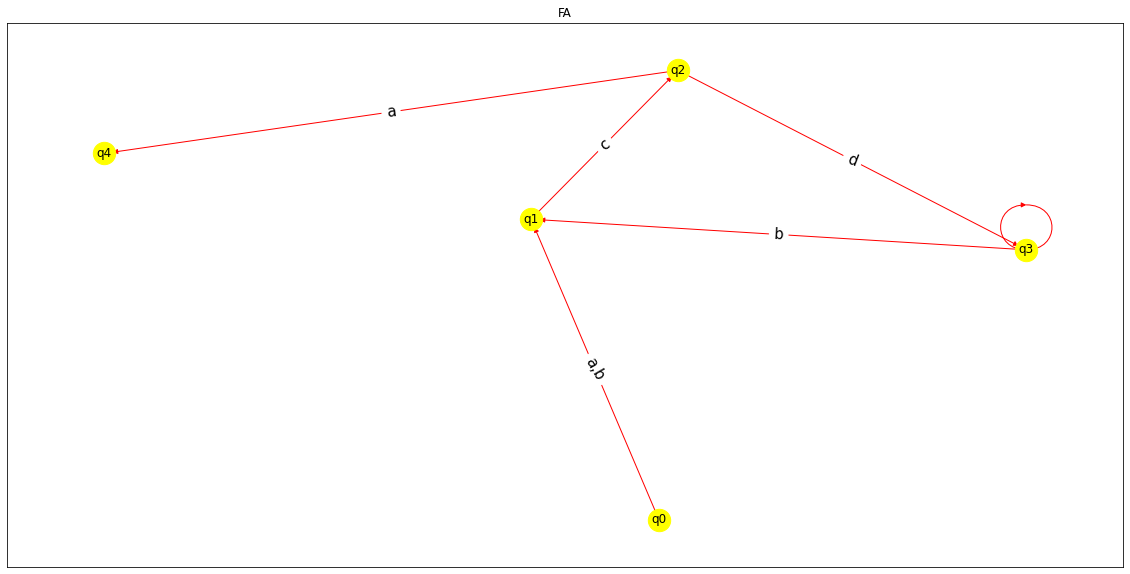

In [16]:
import networkx as nx
import matplotlib.pyplot as plt  

G = nx.DiGraph()  
edges = list() 
labels = dict() 

for x in states_FA: 
    # edges tuple[0][1]
    edges.append((x[0],x[1]))  
    # if a tuple[i][j] exist alread, it just updates it.
    if (x[0],x[1]) in labels.keys():
        labels[(x[0],x[1])] = labels[(x[0],x[1])] + "," + x[2] 
    #else it would assign the Vt[i]
    else:
        labels[(x[0],x[1])] = x[2] 
        
    

G.add_edges_from(edges)
# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G) 


nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = 'yellow', node_size = 500)  




nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=15)  




nx.draw_networkx_labels(G, pos) 

nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='r', arrows=True)    



plt.rcParams["figure.figsize"] = (20,10)
plt.title('FA')
plt.show()  

# Q3 = self-loop with Vt = d.
# Q4 = final state

In [10]:
states_FA

[('q0', 'q1', 'a'),
 ('q0', 'q1', 'b'),
 ('q1', 'q2', 'c'),
 ('q2', 'q3', 'd'),
 ('q3', 'q1', 'b'),
 ('q2', 'q4', 'a'),
 ('q3', 'q3', 'd')]

In [11]:
def parse_check(s):
    index = 0
    state_now = 0
    while index < len(s):
        possible_ways = list() 
        
        for tup in states_FA:
            if f'q{state_now}' == tup[0]:
                possible_ways.append((tup[1],tup[2])) 
                
        if len(possible_ways) == 0:
            return 'Rejected'
        else:
            for elem in possible_ways:
                if s[index]  == elem[1]:
                    index +=1 
                    state_now = int(elem[0][1]) 
                    break

    return 'Accepted'
        

In [18]:
s = input()

bcdbca


In [19]:
result = parse_check(s)
print(result)

Accecpted
